# Exploratory Data Analysis

### *Author: Hank Hoang*
### *Date created: 02/07/2023*
### *Date finished: 05/07/2023*
 * EDA involves exploring and understanding the data to uncover patterns, trends, anomalies, and relationships between variables. The main goal of EDA is to gain insights into the data and identify potential issues before performing more advanced analyses or building predictive models.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/IMDb_data.csv')


Mounted at /content/drive


<ipython-input-2-e0941ffe047a>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/IMDb_data.csv')


In [13]:
df.head()

,tconst,Type,Title,isAdult,startYear,endYear,Runtime,Genres,Rating,Number of Votes,Director Name
0,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1982,William K.L. Dickson
1,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,265,Émile Reynaud
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1838,Émile Reynaud
3,tt0000004,short,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178,Émile Reynaud
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2625,William K.L. Dickson


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944655 entries, 0 to 944654
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           944655 non-null  object 
 1   Type             944655 non-null  object 
 2   Title            944655 non-null  object 
 3   isAdult          944655 non-null  int64  
 4   startYear        944655 non-null  object 
 5   endYear          944655 non-null  object 
 6   Runtime          944655 non-null  object 
 7   Genres           944655 non-null  object 
 8   Rating           944655 non-null  float64
 9   Number of Votes  944655 non-null  int64  
 10  Director Name    944655 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 79.3+ MB


## Checking missing values

In [5]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# If you want to check the percentage of missing values instead:
# missing_percent = df.isnull().mean() * 100

# Display the results
print(missing_values)

tconst             0
Type               0
Title              0
isAdult            0
startYear          0
endYear            0
Runtime            0
Genres             0
Rating             0
Number of Votes    0
Director Name      0
dtype: int64


## Visualization

In [6]:
#Checking statistic information of numerical values - Data Description
df.describe()

,isAdult,Rating,Number of Votes
count,944655.000000,944655.000000,9.446550e+05
mean,0.018180,6.899880,1.195198e+03
std,0.133603,1.374876,1.889715e+04
min,0.000000,1.000000,5.000000e+00
25%,0.000000,6.100000,1.300000e+01
50%,0.000000,7.100000,3.100000e+01
75%,0.000000,7.800000,1.280000e+02
max,1.000000,10.000000,2.757004e+06


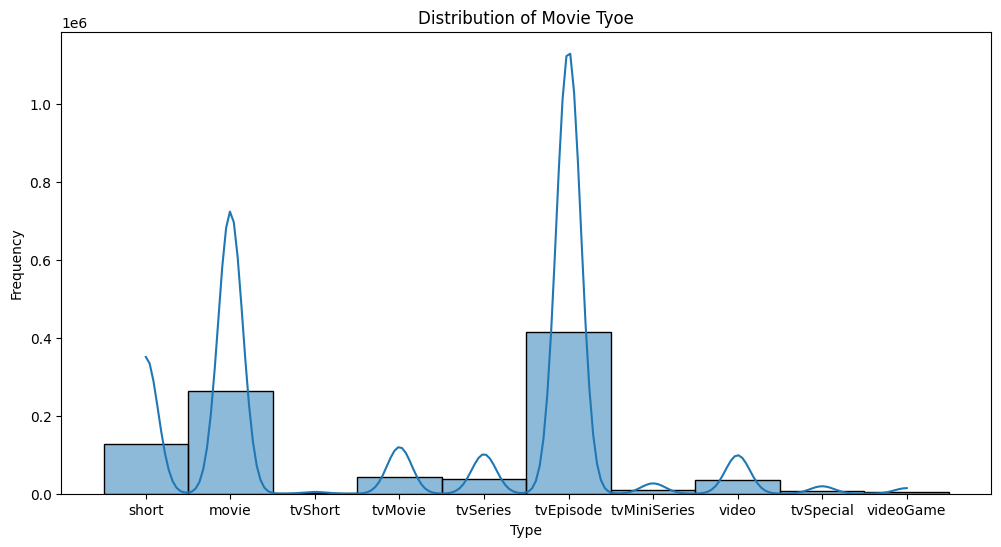

In [7]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Type'], kde=True)
plt.title('Distribution of ' + 'Movie Tyoe')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

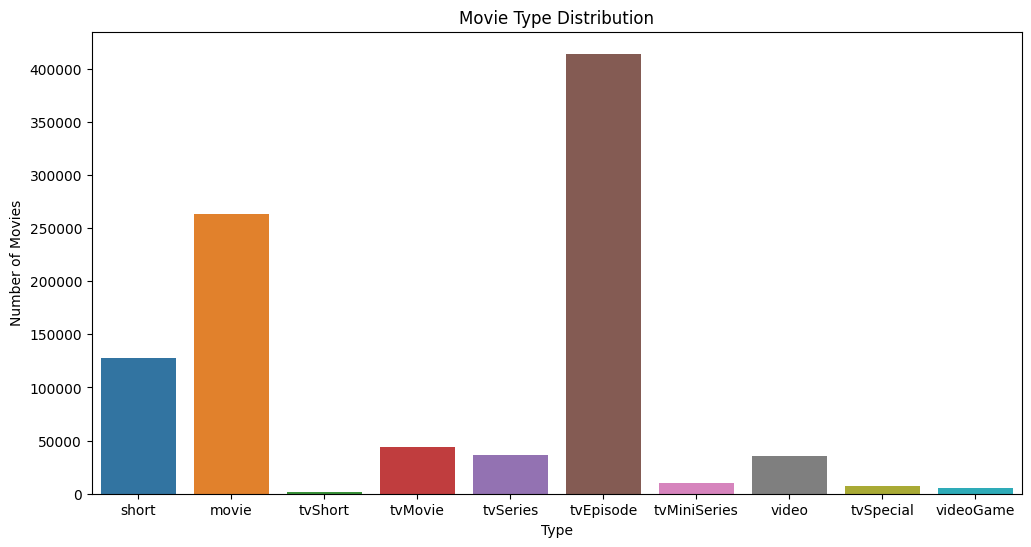

In [8]:
# For categorical variables, use a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df)
plt.title('Movie Type Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Movies')
plt.show()

## How many Genres in IMDb dataset and its distribution?

In [9]:
list_of_genres = df['Genres'].str.split(',')


In [10]:
unique_list=[]
for i in list_of_genres:
    for k in i:
        if k not in unique_list:
            unique_list.append(k)
        else:
            pass

In [11]:
from collections import Counter

my_list = list_of_genres
# Flatten the list of lists
flattened_list = [item for sublist in my_list for item in sublist]

# Count occurrences of each element
value_counts = Counter(flattened_list)

print(value_counts)


Counter({'Drama': 375770, 'Comedy': 300834, 'Short': 129118, 'Crime': 118259, 'Action': 105763, 'Documentary': 99458, 'Adventure': 87723, 'Romance': 80007, 'Animation': 74799, 'Family': 68805, 'Mystery': 53009, 'Thriller': 47725, 'Horror': 45776, 'Fantasy': 40958, 'Music': 28170, 'Sci-Fi': 26883, 'History': 24840, 'Reality-TV': 21766, 'Biography': 19258, 'Adult': 16688, 'Talk-Show': 16385, 'Western': 14879, '\\N': 13707, 'Game-Show': 12478, 'War': 11680, 'Sport': 11123, 'Musical': 10353, 'News': 8228, 'Film-Noir': 856})


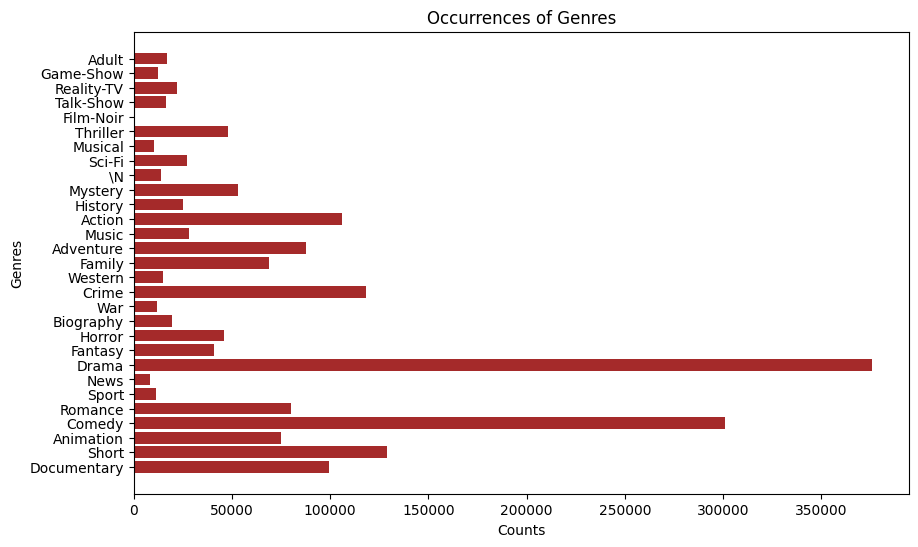

In [12]:
plt.figure(figsize=(10, 6))
# Get the labels (genres) and counts for plotting
labels = list(value_counts.keys())
counts = list(value_counts.values())

# Create a horizontal bar chart
plt.barh(labels, counts, color='brown')

# Add labels and title

plt.xlabel('Counts')
plt.ylabel('Genres')
plt.title('Occurrences of Genres')

# Show the plot
plt.show()

Drana and comedy are the most common genres in the dataset.

In [20]:
average_ratings= df.groupby('Type')['Rating'].mean().reset_index()


In [21]:
average_ratings

,Type,Rating
0,movie,6.153331
1,short,6.896567
2,tvEpisode,7.434228
3,tvMiniSeries,7.111123
4,tvMovie,6.581735
5,tvSeries,6.927120
6,tvShort,6.816846
7,tvSpecial,6.915434
8,video,6.496740
9,videoGame,7.073501


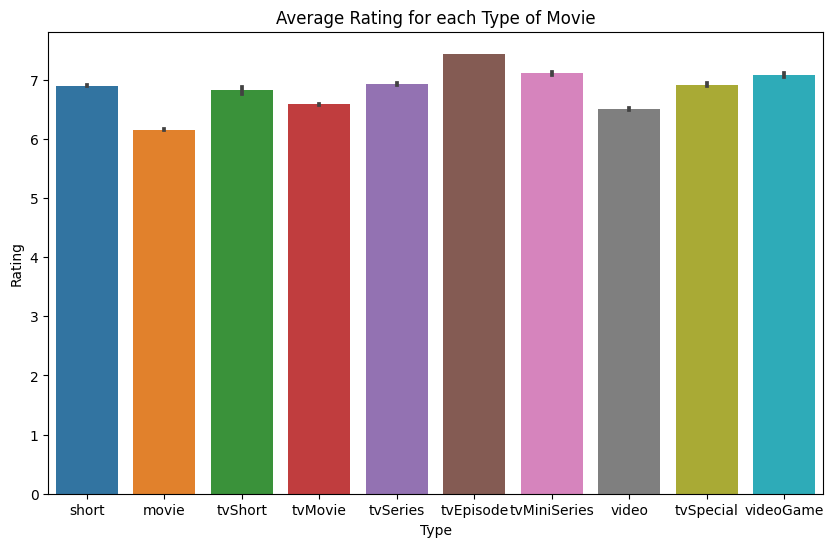

In [23]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Rating', data=df)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Rating')
plt.title('Average Rating for each Type of Movie')

# Show the plot
plt.show()